In [2]:
# 每日情感倾向占比图
%matplotlib inline

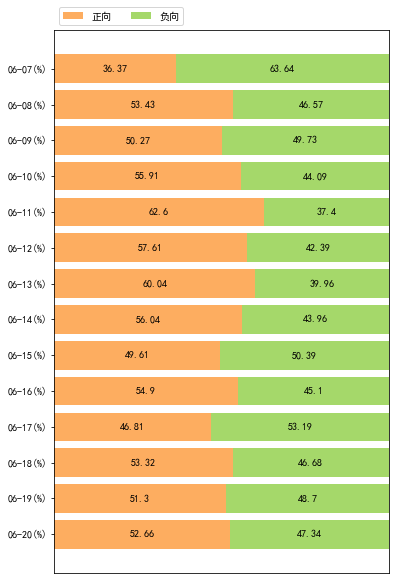

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
category_names = ['正向', '负向']
# 'positive': [36.363636, 53.433476, 50.271739, 55.913124, 62.595578, 57.609562, 60.043313, 56.041737, 49.613690, 54.902855, 46.806118, 53.323338, 51.295670, 52.655889],
# 'negative': [63.636364, 46.566524, 49.728261, 44.086876, 37.404422, 42.390438, 39.956687, 43.958263, 50.386310, 45.097145, 53.193882, 46.676662, 48.704330, 47.344111]
results = {
    '06-07(%)': [36.37, 63.64],
    '06-08(%)': [53.43, 46.57],
    '06-09(%)': [50.27, 49.73],
    '06-10(%)': [55.91, 44.09],
    '06-11(%)': [62.60, 37.40],
    '06-12(%)': [57.61, 42.39],
    '06-13(%)': [60.04, 39.96],
    '06-14(%)': [56.04, 43.96],
    '06-15(%)': [49.61, 50.39],
    '06-16(%)': [54.90, 45.10],
    '06-17(%)': [46.81, 53.19],
    '06-18(%)': [53.32, 46.68],
    '06-19(%)': [51.30, 48.70],
    '06-20(%)': [52.66, 47.34]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.3, 0.7, data.shape[1]))

    fig, ax = plt.subplots(figsize=(6, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)
plt.savefig('../images/每日情感倾向.svg')
plt.show()

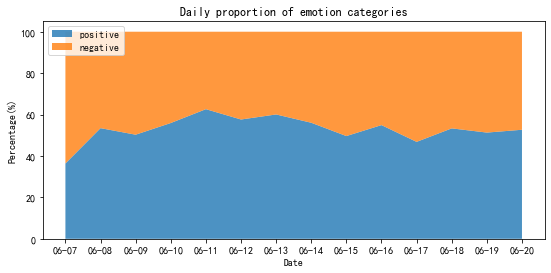

In [4]:
day = ['06-07', '06-08', '06-09', '06-10', '06-11', '06-12', '06-13',
       '06-14', '06-15', '06-16', '06-17', '06-18', '06-19', '06-20']
percentage_perday = {
    'positive': [36.363636, 53.433476, 50.271739, 55.913124, 62.595578, 57.609562, 60.043313, 56.041737, 49.613690,
                 54.902855, 46.806118, 53.323338, 51.295670, 52.655889],
    'negative': [63.636364, 46.566524, 49.728261, 44.086876, 37.404422, 42.390438, 39.956687, 43.958263, 50.386310,
                 45.097145, 53.193882, 46.676662, 48.704330, 47.344111]
}
fig, ax = plt.subplots()
fig.set_figwidth(9)
ax.stackplot(day, percentage_perday.values(),
             labels=percentage_perday.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('Daily proportion of emotion categories')
ax.set_xlabel('Date')
ax.set_ylabel('Percentage(%)')
plt.show()